In [208]:
import json

with open('output/executions/36/simulations/cortex_1/1/bin_rates_B.json', 'r') as j:
     contents = json.loads(j.read())

In [224]:
times = list(map(int, list(contents.keys())))
values = list(contents.values())
values = [x for _, x in sorted(zip(times, values))]
times = sorted(times)

window_size = int(len(values)/10)
i = 0
# Initialize an empty list to store moving averages
ma = []
  
# Loop through the array to consider
# every window of size 3
while i < len(values) - window_size + 1:
    
    # Store elements from i to i+window_size
    # in list to get the current window
    window = values[i : i + window_size]
  
    # Calculate the average of current window
    window_average = round(sum(window) / window_size, 2)
      
    # Store the average of current
    # window in moving average list
    ma.append(window_average)
      
    # Shift window to right by one position
    i += 1

print(len(values))
print(len(ma))
ma = ma + [ma[-1] for x in (range(window_size-1))]
print(len(ma))
  

563
508
563


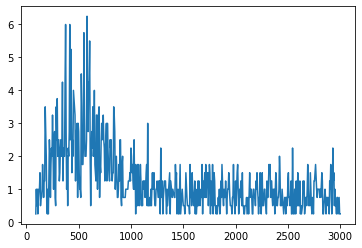

In [225]:
import matplotlib.pyplot as plt
plt.plot(times, values)

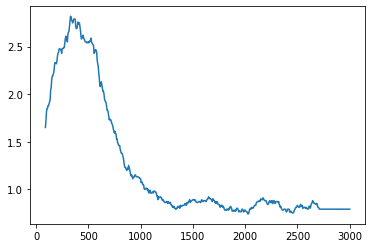

In [226]:

plt.plot(times, ma)

In [17]:
def divide_into_trials(seq, size):
    return [seq[int(pos):(int(pos) + int(size))] for pos in range(0, len(seq), int(size))]

In [27]:
values = [2,3,4,5,6,7,1,1,1,1,3,4,5,6]
threshold = 4
trial_time = 10
bin_size = 2
elements_for_trial = trial_time/bin_size
values_into_trials = divide_into_trials(values, elements_for_trial)
response_times = []
print(values_into_trials)
for values_index, trial_values in enumerate(values_into_trials):
    time_ids = [time_id for time_id, value in enumerate(trial_values) if value >= threshold]
    if len(time_ids):
        first_time_id = time_ids[0]
        print(first_time_id)
        actual_time = (values_index*trial_time)+(first_time_id*bin_size)
        response_times.append(actual_time)
print(response_times)

[[2, 3, 4, 5, 6], [7, 1, 1, 1, 1], [3, 4, 5, 6]]
2
0
1
[4, 10, 22]
